# Лабораторна робота 10

# Тема. Стиснення даних. Жадібна стратегія на прикладі кодування Гафмена
# Мета: навчитись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.

## 1.Дерево кодів Гафмена згідно з варіантом

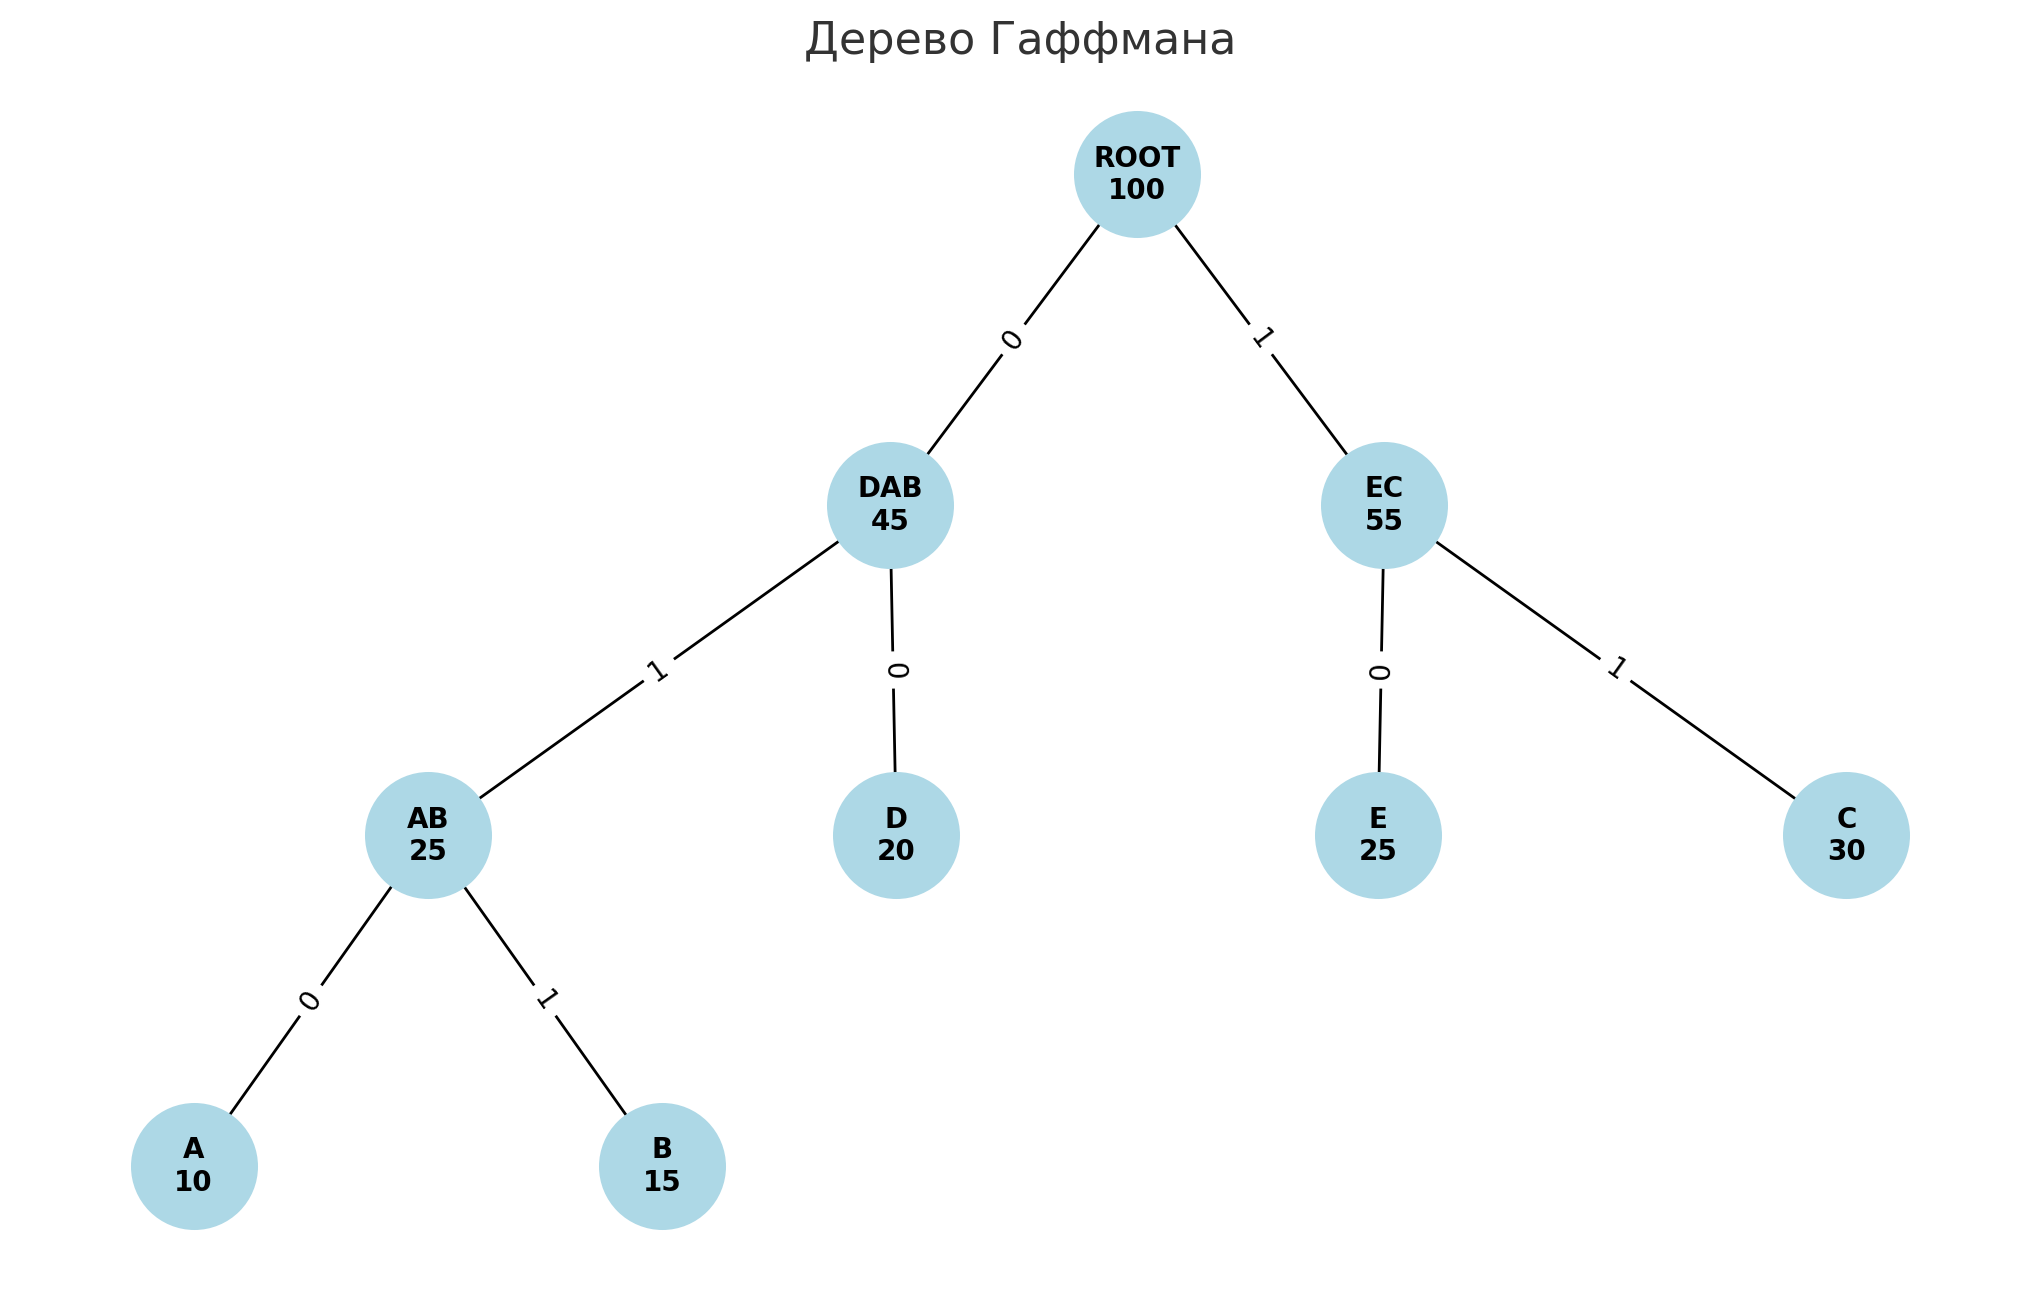

## 2.Розв'язок цього завдання:

In [ ]:
import heapq

class node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''

    def __lt__(self, nxt):
        return self.freq < nxt.freq

def printNodes(node, val=''):
    newVal = val + str(node.huff)
    if node.left:
        printNodes(node.left, newVal)
    if node.right:
        printNodes(node.right, newVal)
    if not node.left and not node.right:
        print(f"{node.symbol} -> {newVal}")

# Нові символи та їх частоти
chars = ['A', 'B', 'C', 'D', 'E']
freq = [10, 15, 30, 20, 25]

# Побудова дерева Гаффмана
nodes = []
for i in range(len(chars)):
    heapq.heappush(nodes, node(freq[i], chars[i]))

while len(nodes) > 1:
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    left.huff = 0
    right.huff = 1

    newNode = node(left.freq + right.freq, left.symbol + right.symbol, left, right)
    heapq.heappush(nodes, newNode)

# Вивід кодів Гаффмана
printNodes(nodes[0])

## 3.Результат цього кода:

C -> 0

E -> 10

D -> 110

B -> 1110

A -> 1111

## 4.Процедура на Python, яка для вхідного повідомлення обчислює список символів chars та список їх частот freq

In [ ]:
import heapq
from collections import defaultdict

# to map each character its huffman value
codes = {}

# To store the frequency of character of the input data
freq = defaultdict(int)

# A Huffman tree node
class MinHeapNode:
    def __init__(self, data, freq):
        self.left = None
        self.right = None
        self.data = data
        self.freq = freq

    def __lt__(self, other):
        return self.freq < other.freq

# utility function to print characters along with
# there huffman value
def printCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        print(root.data, ":", str)
    printCodes(root.left, str + "0")
    printCodes(root.right, str + "1")

# utility function to store characters along with
# there huffman value in a hash table
def storeCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        codes[root.data] = str
    storeCodes(root.left, str + "0")
    storeCodes(root.right, str + "1")

# function to build the Huffman tree and store it
# in minHeap
def HuffmanCodes(size):
    global minHeap
    for key in freq:
        minHeap.append(MinHeapNode(key, freq[key]))
    heapq.heapify(minHeap)
    while len(minHeap) != 1:
        left = heapq.heappop(minHeap)
        right = heapq.heappop(minHeap)
        top = MinHeapNode('$', left.freq + right.freq)
        top.left = left
        top.right = right
        heapq.heappush(minHeap, top)
    storeCodes(minHeap[0], "")

# utility function to store map each character with its
# frequency in input string
def calcFreq(str, n):
    for i in range(n):
        freq[str[i]] += 1

# function iterates through the encoded string s
# if s[i]=='1' then move to node->right
# if s[i]=='0' then move to node->left
# if leaf node append the node->data to our output string
def decode_file(root, s):
    ans = ""
    curr = root
    n = len(s)
    for i in range(n):
        if s[i] == '0':
            curr = curr.left
        else:
            curr = curr.right

        # reached leaf node
        if curr.left is None and curr.right is None:
            ans += curr.data
            curr = root
    return ans + '\0'

# Driver code
if __name__ == "__main__":
    minHeap = []
    str = "huffman"
    encodedString, decodedString = "", ""
    calcFreq(str, len(str))
    HuffmanCodes(len(str))
    print("Character With there Frequencies:")
    for key in sorted(codes):
        print(key, codes[key])

    for i in str:
        encodedString += codes[i]

    print("\nEncoded Huffman data:")
    print(encodedString)

    # Function call
    decodedString = decode_file(minHeap[0], encodedString)
    print("\nDecoded Huffman Data:")
    print(decodedString)

## 5.Результат цього кода:

In [ ]:
Character With there Frequencies:
a 110
f 01
h 101
m 111
n 100
u 00

Encoded Huffman data:
101000101111110100

Decoded Huffman Data:
huffman 

## 6.Висновок:

Навчився реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.

## 7.Відповіді на запитання:

1. Що таке жадібні алгоритми?

Жадібні алгоритми — це алгоритми, які приймають локально оптимальні рішення на кожному кроці, сподіваючись, що це призведе до глобального оптимального розв’язку.

2. Що таке префіксний код? Який код використовується у коді Гафмена?

Префіксний код — це код, у якому жодне закодоване слово не є префіксом іншого. Код Гафмена використовує префіксний код, побудований на основі частотності символів.

3. Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»?

Купа — це структура даних, яка забезпечує швидкий доступ до мінімального або максимального елемента. Вона лежить в основі черги з пріоритетами, де елементи витягуються за їх пріоритетом.

4. Що таке стиснення даних і для чого воно використовується? Які його основні переваги?

Стиснення даних — це процес зменшення їхнього обсягу для економії пам’яті або прискорення передачі. Основні переваги — зменшення використання дискового простору та мережевих ресурсів.

5. Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гафмена?

Кроки кодування Гафмена:

    Аналіз частотності символів.
    
    Побудова дерева Гафмена.
    
    Генерація кодів для символів.
    
    Кодування вихідного повідомлення.

6. Які основні обмеження та недоліки алгоритму кодування Гафмена? Чи можливо покращити його продуктивність?

Недоліки коду Гафмена:

    Неефективний для невеликих наборів символів.
    
    Не враховує контекст, як, наприклад, арифметичне кодування.
    
    Можна покращити продуктивність, використовуючи адаптивні методи.

7. Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена?

Альтернативи: LZW, арифметичне кодування, методи стиснення на основі Шеннона-Фано, BWT.

8. Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних системах?

Практичне застосування:

    Стиснення файлів (ZIP, PNG).
    
    Оптимізація передавання даних в телекомунікаціях.
    
    Використання у системах зберігання та обробки великих обсягів інформації.